In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import time
import itertools
from scipy import stats
import psycopg2 as psql
from psycopg2.extras import RealDictCursor
import pickle

import sys
sys.path.append("..")
from tools.flight_projection import *

import seaborn as sns
sns.set(color_codes=True)

/home/victor/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
det_dict = load_obj('deterministic_dict')
intent_dict = load_obj('intent_dict')

/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/victor/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


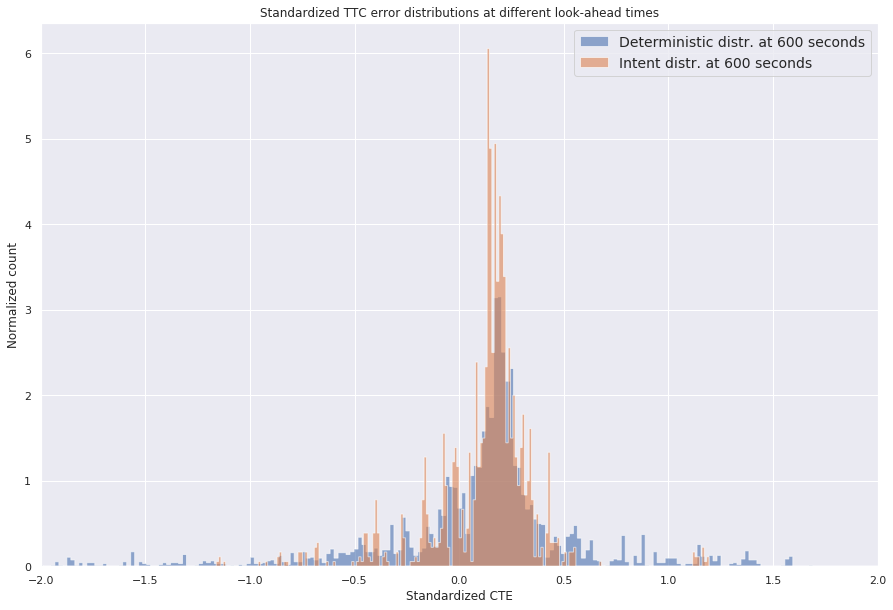

In [38]:
lt = 600

det_data = [x for x in det_dict[str(lt)] if not np.isnan(x)]
int_data = [x for x in intent_dict[str(lt)] if not np.isnan(x)]

det_stdz = (det_data-np.mean(det_data))/np.std(det_data)
int_stdz = (int_data-np.mean(int_data))/np.std(int_data)

from matplotlib import mlab
fig, ax = plt.subplots(figsize=(15, 10))

n_bins = 800

# n, bins, patches = 
ax.hist(det_stdz, n_bins, normed=1, histtype='stepfilled',
       cumulative=False, label='Deterministic distr. at %s seconds' % lt, alpha=0.6)

ax.hist(int_stdz, n_bins, normed=1, histtype='stepfilled',
       cumulative=False, label='Intent distr. at %s seconds' % lt, alpha=0.6)
    
#     plt.xlabel('')
plt.legend(prop={'size': 14})
plt.xlim(-2,2)
# plt.ylim(-500,500)
plt.xlabel('Standardized CTE')
plt.ylabel('Normalized count')
plt.title('Standardized TTC error distributions at different look-ahead times')
plt.show()

In [10]:
len(intent_dict[str(lt)])

5008

In [ ]:
for k in [kx for kx in bin_df.keys() if int(kx) <= 1200]:
    box_data.append((int(k), [i for i in bin_df[k] if not np.isnan(i)]))
    
box_data_sort = sorted(box_data, key=lambda tup: tup[0])
box_data_2 = [i[1] for i in box_data_sort]

x = range(len(box_data_2))

plt.figure(figsize=(20,8))
plt.boxplot(box_data_2, showfliers=False, patch_artist=True, whis=[5,95])
plt.xticks(x, [i[0] for i in box_data_sort])
plt.xticks(rotation=70)
plt.xlabel('Look-ahead time (seconds)')
plt.ylabel('TTC difference in seconds')
plt.title('Evolution of TTC error over look-ahead time')
plt.show()